### **Laboratorio 8 - Puesta en producción de un modelo de ML**

Stefano Aragoni, Carol Arévalo, Luis Santos



---------

##### *Contexto*

El mercado inmobiliario en las grandes ciudades brasileñas ha experimentado cambios significativos en los últimos años debido a factores socioeconómicos y de desarrollo urbano. Es vital para las agencias inmobiliarias y los inversores comprender los factores que influyen en el precio del alquiler de viviendas para tomar decisiones informadas.

##### *Objetivo*

Reforzar el aprendizaje en selección de modelos y despliegue de soluciones de Machine Learning utilizando un conjunto de datos sobre alquiler de viviendas en Brasil.

------------    

#### **Parte 1 - Selección de Modelos**

##### *Importar librerías*
Como primer paso, se cargaron todas las librerías necesarias para el desarrollo del laboratorio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##### *Cargar el Conjunto de Datos*



Posteriormente, se <font color=orange>cargó el conjunto de datos houses_to_rent_v2.csv</font>. Este conjunto de datos contiene información sobre el alquiler de viviendas en Brasil. El objetivo es predecir el precio de alquiler de una vivienda en función de las características de la misma.

Este conjunto de datos contiene las siguientes columnas:

| Campo             | Descripción                                   |
|-------------------|-----------------------------------------------|
| city              | Ciudad de ubicación                           |
| area              | Área en m²                                    |
| rooms             | Número de habitaciones                        |
| bathroom          | Número de baños                               |
| parking spaces    | Número de espacios para parqueo               |
| floor             | Nivel o piso en el que se encuentra           |
| animal            | Si se permiten animales (Sí/No)               |
| furniture         | Si está amueblado (Sí/No)                     |
| hoa $             | Impuesto de la Asociación de Residentes (R$)  |
| rent amount $     | Mensualidad (R$)                              |
| property tax $    | Impuesto sobre bienes inmuebles (R$)          |
| fire insurance $  | Seguro contra incendios (R$)                  |
| total (R$)        | Total de la renta mensual (R$)                |


In [2]:
# Crear un DataFrame con el contenido
df = pd.read_csv('houses_to_rent_v2.csv')

# Explorar las primeras 10 filas del DataFrame
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955



##### *Análisis Exploratorio de Datos (EDA)*


Como primer paso del análisis exploratorio, se <font color=orange>obtuvo estadísticas descriptivas básicas de las variables del conjunto de datos</font>.

En el análisis de los datos, se observa que las propiedades en el conjunto varían en términos de área, habitaciones y baños. En promedio, las propiedades tienen aproximadamente 149 metros cuadrados de área, alrededor de 2.5 habitaciones y 2.2 baños. Además, la mayoría de las propiedades cuentan con estacionamiento, aunque algunas no lo tienen. Los costos mensuales también varían significativamente, con una mensualidad promedio de alrededor de R$3,896 y un total mensual promedio de R$5,490. 

La distribución de los datos en este conjunto es notablemente asimétrica y con una variabilidad significativa en varias de las características. Por ejemplo, la variable "area" muestra una desviación estándar bastante alta en comparación con la media, lo que indica una amplia dispersión de las áreas de las propiedades. Similarmente, "hoa (R$)" y "property tax (R$)" exhiben una alta variabilidad en relación con sus medias. Esto sugiere que existe una amplia gama de valores en estas variables, con algunos puntos atípicos que tienen valores mucho más altos que la mayoría de las observaciones.

In [3]:
# Estadísticas descriptivas básicas
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


Como segundo paso, se realizó una <font color=orange>visualización de la distribución de las variables numéricas del conjunto de datos</font>.

Nuevamente, se puede observar que casas con menos área, habitaciones, baños, y parqueos son más comunes. Asimismo, se puede observar que existen pocas casas varias habitaciones, baños y parqueos. Esto se puede deber a que las casas con estas características son más costosas y por lo tanto menos comunes.

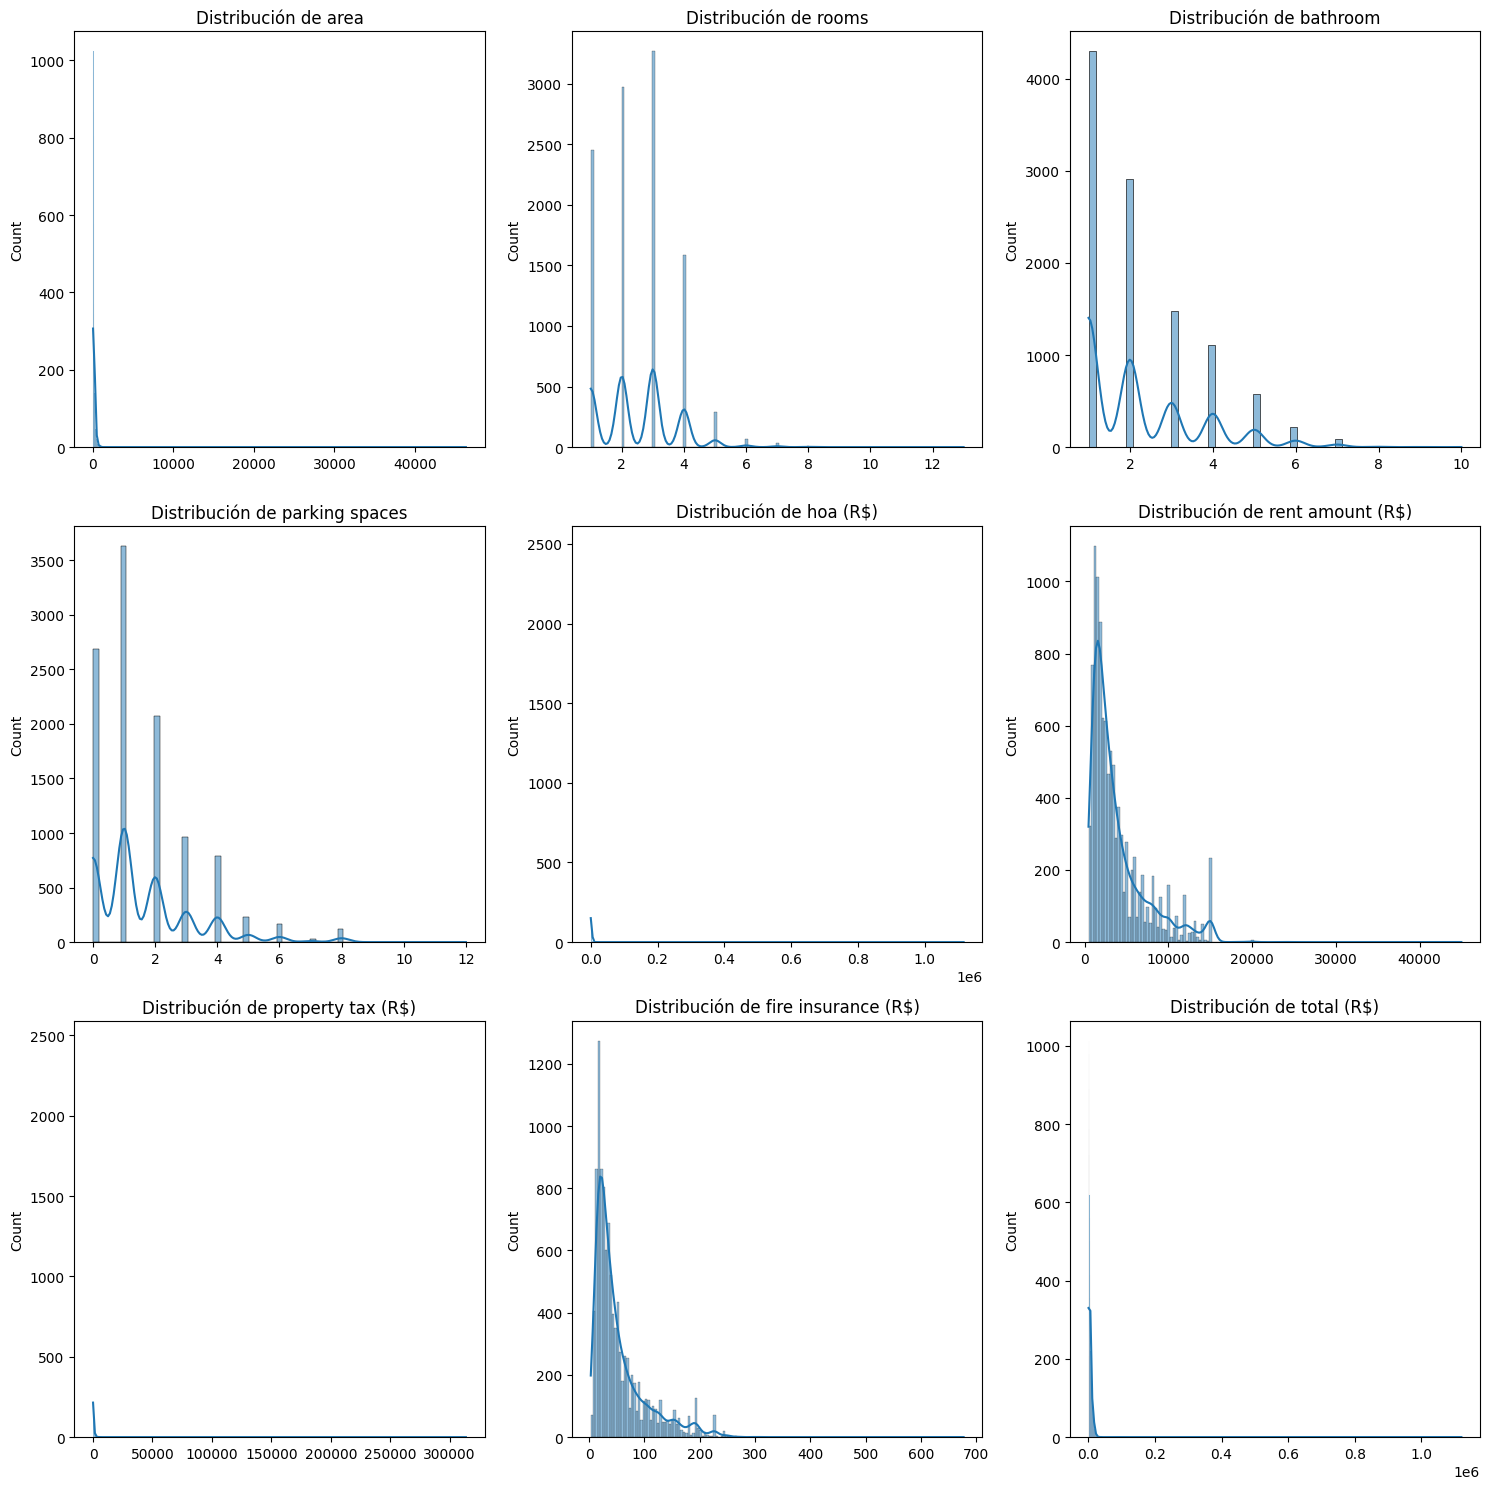

In [4]:
# variables numericas
num_vars = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
df_values = df[num_vars].values
columns = df[num_vars].columns

# Iterar a través de las filas y columnas de la cuadrícula
for i in range(3):
    for j in range(3):
        column = columns[i * 3 + j]
        sns.histplot(df_values[:, i * 3 + j], kde=True, ax=axes[i, j])
        axes[i, j].set_title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

Como tercer paso, se quiso determinar <font color=orange>si existen valores nulos en el conjunto de datos</font>. En este caso, sí existen propiedades con precios atípicos. No obstante, se decidió no eliminarlos del conjunto de datos, ya que estos valores atípicos pueden ser de interés para el análisis.

<AxesSubplot: >

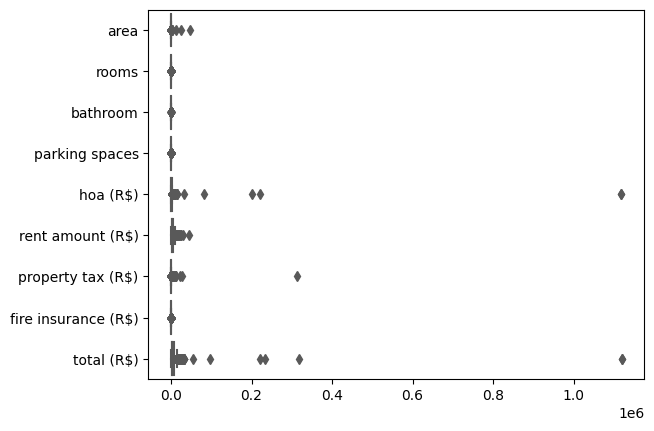

In [5]:
# Ver datos atipicos
sns.boxplot(data=df, orient='h', palette='Set2')